In [1]:
!pip install stargazer
!pip install prettytable
!pip install tabulate
!pip install matplotlib
!pip install ipywidgets

  Obtaining dependency information for stargazer from https://files.pythonhosted.org/packages/05/ef/bf2eb43ff3047099f3c2f502040fcca384d3b035adf38cefcca96ae6cf92/stargazer-0.0.6-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/4d/81/316b6a55a0d1f327d04cc7b0ba9d04058cb62de6c3a4d4b0df280cbe3b0b/prettytable-3.9.0-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\3841870418.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


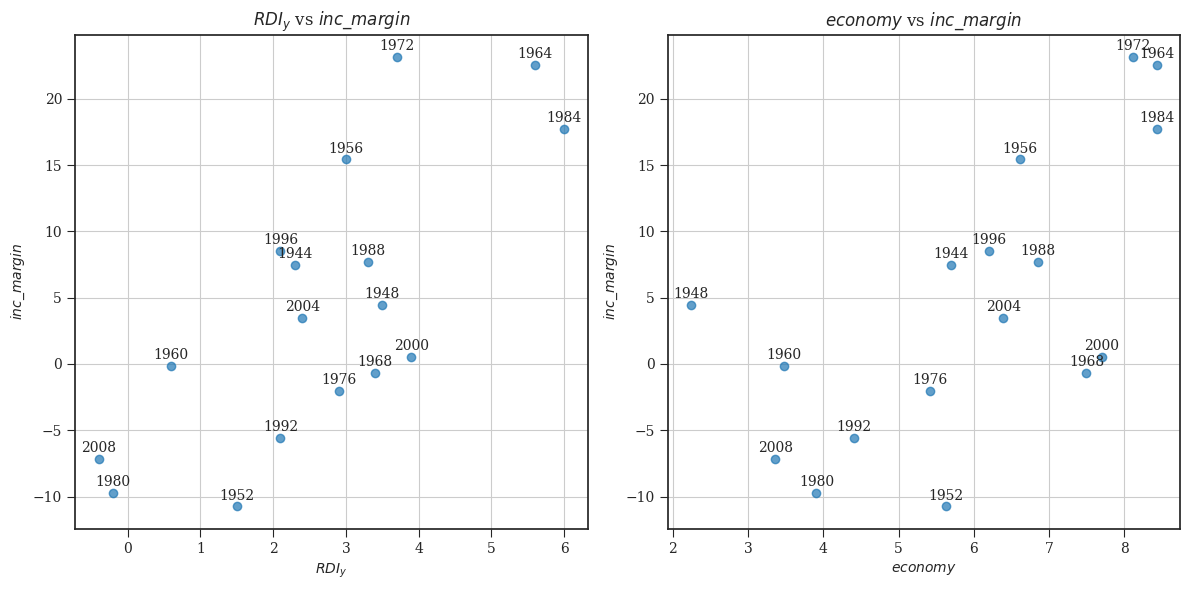

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

dropbox_url = "https://www.dropbox.com/scl/fi/s17h2uz3pxaqffbnrcxy7/df_vote.csv?rlkey=ostwpsa0m6syqzke0kpkwf892&dl=1"

# Download the CSV content using pandas
df_vote = pd.read_csv(dropbox_url, index_col=0)

# Set LaTeX-like theme
plt.style.use('seaborn-ticks')
plt.rcParams['font.family'] = 'serif'

# Assuming you have already read the CSV and have the DataFrame df_vote

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of RDI_y against inc_margin with year labels (on the left)
axs[0].scatter(df_vote['RDI_y'], df_vote['inc_margin'], alpha=0.7)
for i, row in df_vote.iterrows():
    year_str = str(i)  # Convert index year to string
    axs[0].annotate(year_str, (row['RDI_y'], row['inc_margin']), textcoords="offset points", xytext=(0,5), ha='center')
axs[0].set_title('$RDI_y$ vs $inc\_margin$')
axs[0].set_xlabel('$RDI_y$')
axs[0].set_ylabel('$inc\_margin$')
axs[0].grid(True)

# Scatter plot of economy against inc_margin with year labels (on the right)
axs[1].scatter(df_vote['economy'], df_vote['inc_margin'], alpha=0.7)
for i, row in df_vote.iterrows():
    year_str = str(i)  # Convert index year to string
    axs[1].annotate(year_str, (row['economy'], row['inc_margin']), textcoords="offset points", xytext=(0,5), ha='center')
axs[1].set_title('$economy$ vs $inc\_margin$')
axs[1].set_xlabel('$economy$')
axs[1].set_ylabel('$inc\_margin$')
axs[1].grid(True)

# Adjust layout and show plots
plt.tight_layout()
plt.savefig(r"C:\Users\danbo\OneDrive - Fundacao Getulio Vargas - FGV\FGV\Q3.23\GIT\GIT\incmarg.png")

# Display the saved plot
plt.show()

In [5]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 660.6 kB/s eta 0:00:14
      --------------------------------------- 0.1/9.2 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.2/9.2 MB 1.9 MB/s eta 0:00:05
     - -------------------------------------- 0.3/9.2 MB 2.0 MB/s eta 0:00:05
     - -------------------------------------- 0.4/9.2 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/9.2 MB 2.1 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/9.2 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/9.2 MB 2.3 MB/s eta 0:00:04
     --- ------------------------------------ 0.9/9.2 MB 2.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/9.2 MB 2.5 MB/s eta 0:00:04
     ----- ---------------------------------- 1.2/9.2 MB 2.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.3/9.2 MB 2.7 MB/s eta


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import HTML

def run_regression_and_test(df, dependent_variables, rescaled=False):
    stargazer_models = []

    for dependent_variable in dependent_variables:
        df_model = df[[dependent_variable, 'RDI_1', 'RDI_2', 'RDI_3', 'RDI_4']].dropna()

        if rescaled:
            # Rescale dependent variable
            df_model[dependent_variable + '_scaled'] = (df_model[dependent_variable] - df_model[dependent_variable].min()) / (df_model[dependent_variable].max() - df_model[dependent_variable].min())
            y = df_model[dependent_variable + '_scaled']
        else:
            y = df_model[dependent_variable]

        X = sm.add_constant(df_model[['RDI_1', 'RDI_2', 'RDI_3', 'RDI_4']])
        model = sm.OLS(y, X).fit()

        hypothesis_test_results = model.t_test(['RDI_1 = RDI_4', 'RDI_2 = RDI_4', 'RDI_3 = RDI_4'])

        stargazer_models.append(model)

    return stargazer_models

# Example usage
dependent_variables = ['economy', 'inc_margin']

# Run original models
models_original = run_regression_and_test(df_vote, dependent_variables)

# Run rescaled models
models_rescaled = run_regression_and_test(df_vote, dependent_variables, rescaled=True)

# Combine both sets of models
all_models = models_original + models_rescaled

# Create Stargazer object with models
stargazer = Stargazer(all_models)

# Set column titles
columns = ['Economy Model', 'Income Margin Model', 'Economy Model (Rescaled)', 'Income Margin Model (Rescaled)']
stargazer.custom_columns(columns, [1, 1, 1, 1])

# Display Stargazer table as HTML
HTML(stargazer.render_html())


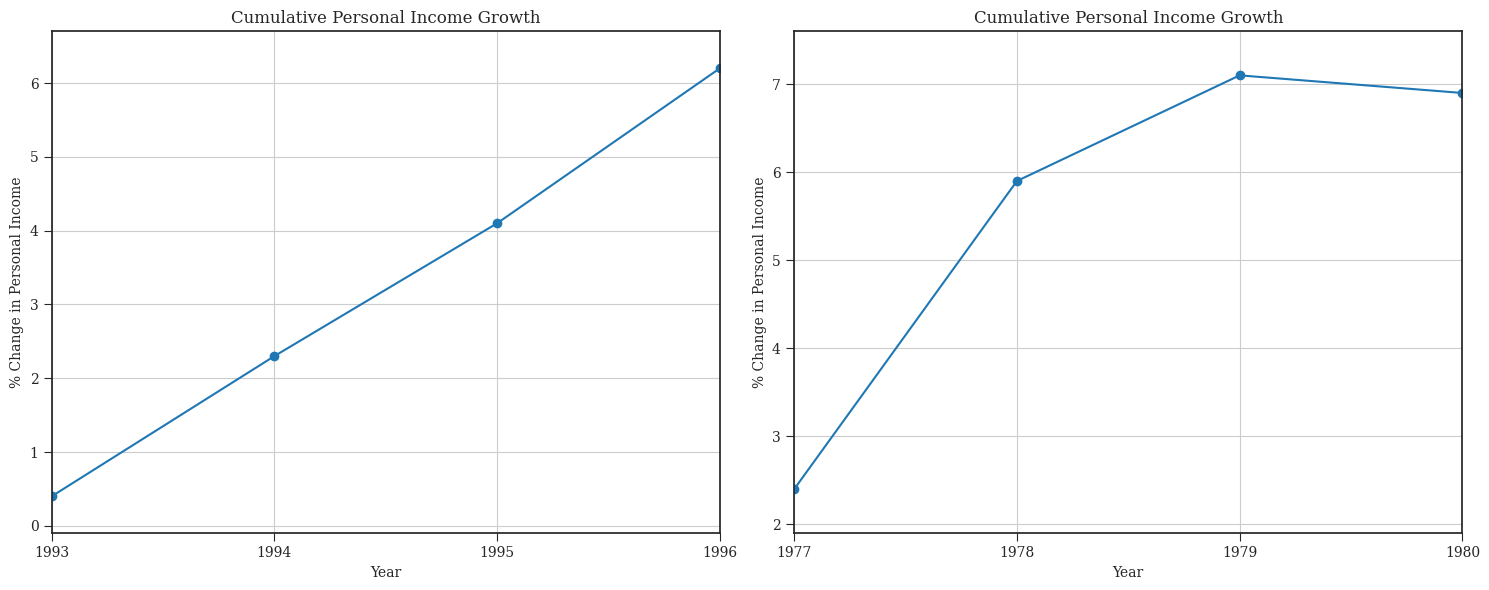

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# Read the CSV data
dropbox_urlF = "https://www.dropbox.com/scl/fi/5c2jkx2eeai2qfcbcwxcf/df_voteF.csv?rlkey=1io0vhhbu2wn1zbiyvsqsh7n8&dl=1"
df_voteF = pd.read_csv(dropbox_urlF)
df_voteF['year'] = pd.to_datetime(df_voteF['year'], format='%Y')

# Calculate the cumulative growth of RDI_y in 4-year terms
df_voteF['cumulative_growth'] = df_voteF.groupby((df_voteF['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()

# Filter data for the left plot (1993 to 1996)
left_data = df_voteF[(df_voteF['year'] >= '1993') & (df_voteF['year'] <= '1996')]

# Filter data for the right plot (1977 to 1980)
right_data = df_voteF[(df_voteF['year'] >= '1977') & (df_voteF['year'] <= '1980')]

# Set up a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot cumulative growth on the left subplot
axs[0].plot(left_data['year'], left_data['cumulative_growth'], marker='o')
axs[0].set_title('Cumulative Personal Income Growth')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
date_form = DateFormatter("%Y")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[0].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[0].set_xlim(left_data['year'].min(), left_data['year'].max())
axs[0].set_ylim(left_data['cumulative_growth'].min() - 0.5, left_data['cumulative_growth'].max() + 0.5)

# Plot cumulative growth on the right subplot
axs[1].plot(right_data['year'], right_data['cumulative_growth'], marker='o')
axs[1].set_title('Cumulative Personal Income Growth')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
axs[1].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[1].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[1].set_xlim(right_data['year'].min(), right_data['year'].max())
axs[1].set_ylim(right_data['cumulative_growth'].min() - 0.5, right_data['cumulative_growth'].max() + 0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(r"C:\Users\danbo\OneDrive - Fundacao Getulio Vargas - FGV\FGV\Q3.23\GIT\GIT\clintoncarter_cumulative.png")
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\2607061913.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_data['cumulative_growth'] = left_data.groupby((left_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\2607061913.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_data['cumulative_growth'] = right_data.groupby((right_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()


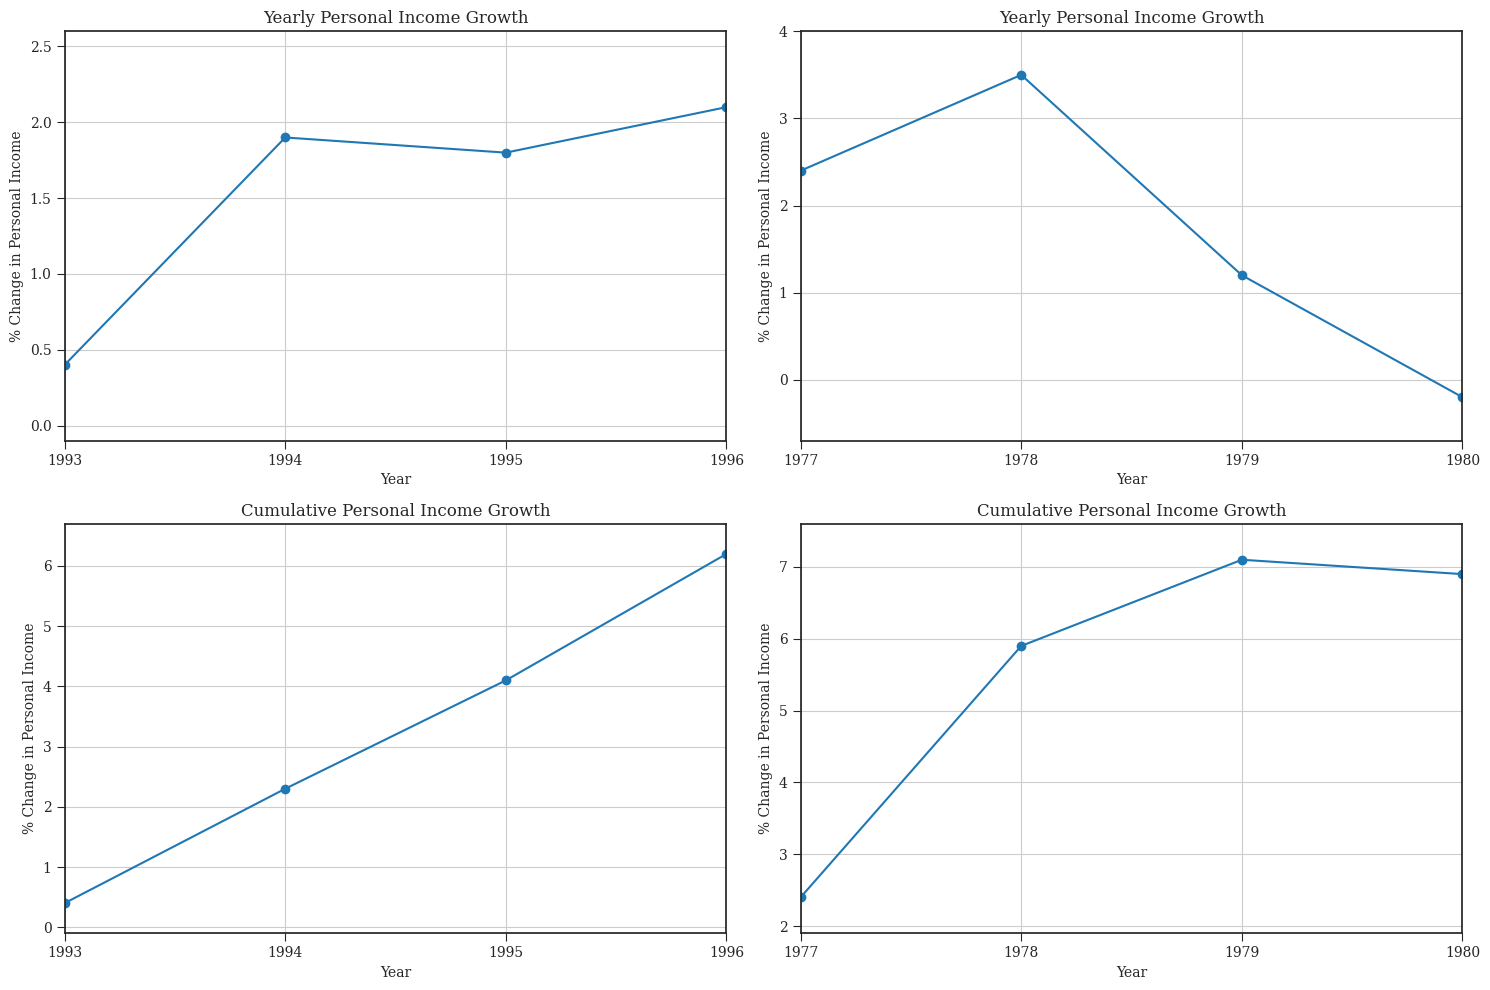

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# Read the CSV data
dropbox_urlF = "https://www.dropbox.com/scl/fi/5c2jkx2eeai2qfcbcwxcf/df_voteF.csv?rlkey=1io0vhhbu2wn1zbiyvsqsh7n8&dl=1"
df_voteF = pd.read_csv(dropbox_urlF)
df_voteF['year'] = pd.to_datetime(df_voteF['year'], format='%Y')

# Filter data for the left plot (1993 to 1996)
left_data = df_voteF[(df_voteF['year'] >= '1993') & (df_voteF['year'] <= '1996')]

# Filter data for the right plot (1977 to 1980)
right_data = df_voteF[(df_voteF['year'] >= '1977') & (df_voteF['year'] <= '1980')]

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot on the top-left subplot
axs[0, 0].plot(left_data['year'], left_data['RDI_y'], marker='o')
axs[0, 0].set_title('Yearly Personal Income Growth')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
date_form = DateFormatter("%Y")
axs[0, 0].xaxis.set_major_formatter(date_form)
axs[0, 0].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[0, 0].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[0, 0].set_xlim(left_data['year'].min(), left_data['year'].max())
axs[0, 0].set_ylim(left_data['RDI_y'].min() - 0.5, left_data['RDI_y'].max() + 0.5)

# Plot on the top-right subplot
axs[0, 1].plot(right_data['year'], right_data['RDI_y'], marker='o')
axs[0, 1].set_title('Yearly Personal Income Growth')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
axs[0, 1].xaxis.set_major_formatter(date_form)
axs[0, 1].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[0, 1].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[0, 1].set_xlim(right_data['year'].min(), right_data['year'].max())
axs[0, 1].set_ylim(right_data['RDI_y'].min() - 0.5, right_data['RDI_y'].max() + 0.5)

# Calculate the cumulative growth of RDI_y in 4-year terms
left_data['cumulative_growth'] = left_data.groupby((left_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()
right_data['cumulative_growth'] = right_data.groupby((right_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()

# Plot cumulative growth on the bottom-left subplot
axs[1, 0].plot(left_data['year'], left_data['cumulative_growth'], marker='o')
axs[1, 0].set_title('Cumulative Personal Income Growth')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
axs[1, 0].xaxis.set_major_formatter(date_form)
axs[1, 0].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[1, 0].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[1, 0].set_xlim(left_data['year'].min(), left_data['year'].max())
axs[1, 0].set_ylim(left_data['cumulative_growth'].min() - 0.5, left_data['cumulative_growth'].max() + 0.5)

# Plot cumulative growth on the bottom-right subplot
axs[1, 1].plot(right_data['year'], right_data['cumulative_growth'], marker='o')
axs[1, 1].set_title('Cumulative Personal Income Growth')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
axs[1, 1].xaxis.set_major_formatter(date_form)
axs[1, 1].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[1, 1].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[1, 1].set_xlim(right_data['year'].min(), right_data['year'].max())
axs[1, 1].set_ylim(right_data['cumulative_growth'].min() - 0.5, right_data['cumulative_growth'].max() + 0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(r"C:\Users\danbo\OneDrive - Fundacao Getulio Vargas - FGV\FGV\Q3.23\GIT\GIT\clintoncarter_cum.png")
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\600054834.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_data['cumulative_growth'] = left_data.groupby((left_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\600054834.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_data['cumulative_growth'] = right_data.groupby((right_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()


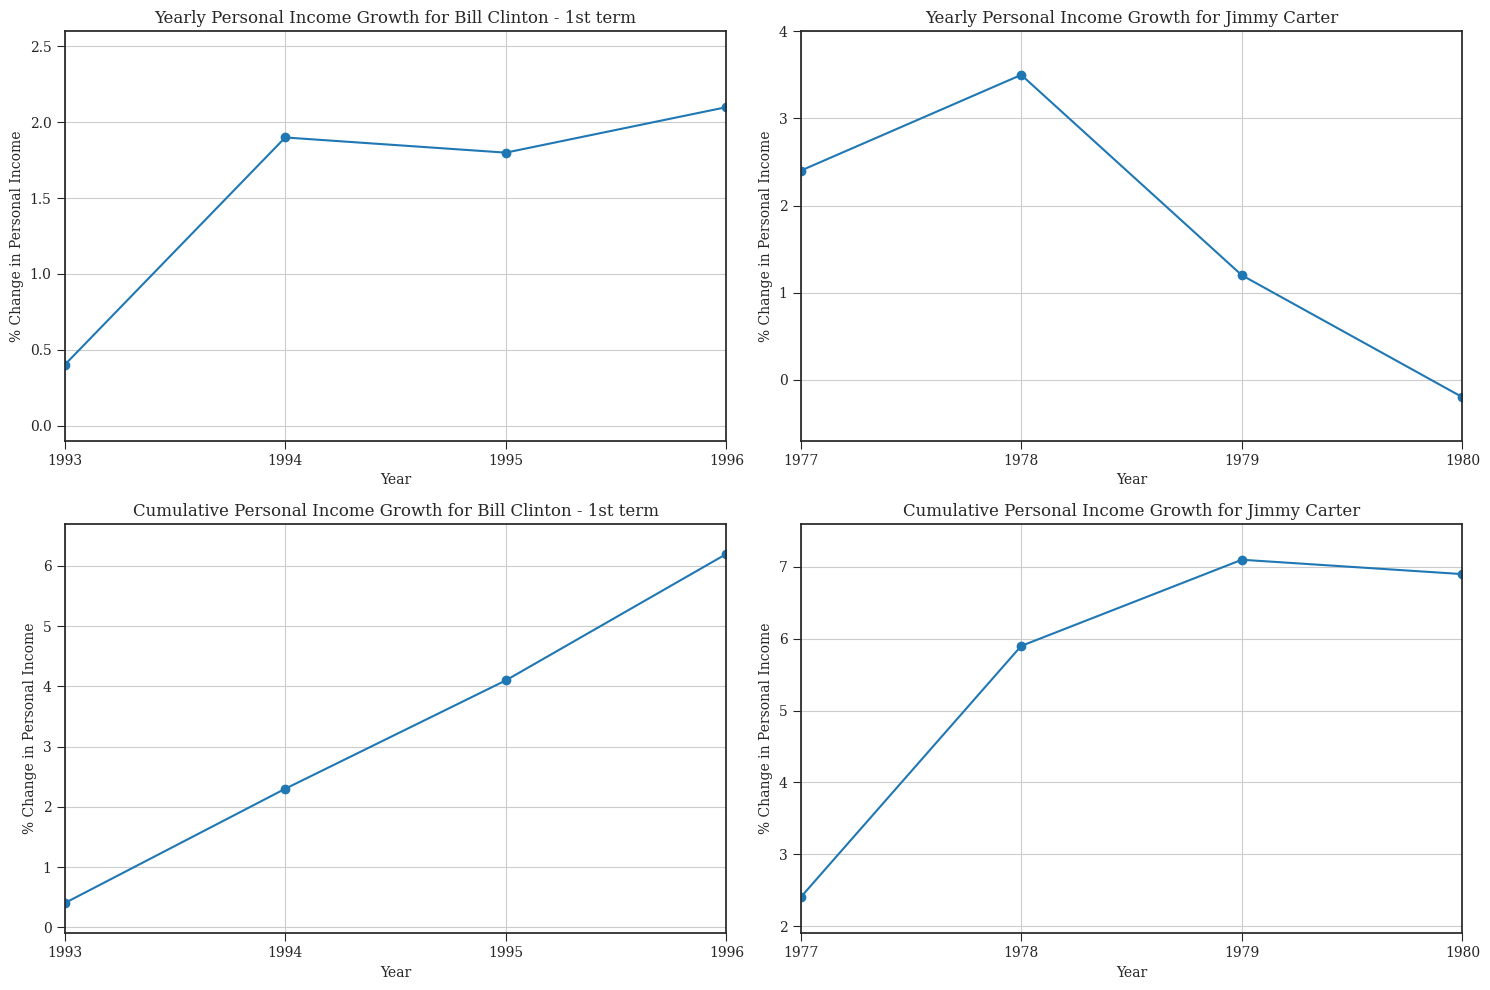

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# Read the CSV data
dropbox_urlF = "https://www.dropbox.com/scl/fi/5c2jkx2eeai2qfcbcwxcf/df_voteF.csv?rlkey=1io0vhhbu2wn1zbiyvsqsh7n8&dl=1"
df_voteF = pd.read_csv(dropbox_urlF)
df_voteF['year'] = pd.to_datetime(df_voteF['year'], format='%Y')

# Filter data for the left plot (1993 to 1996)
left_data = df_voteF[(df_voteF['year'] >= '1993') & (df_voteF['year'] <= '1996')]

# Filter data for the right plot (1977 to 1980)
right_data = df_voteF[(df_voteF['year'] >= '1977') & (df_voteF['year'] <= '1980')]

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot on the top-left subplot
axs[0, 0].plot(left_data['year'], left_data['RDI_y'], marker='o')
axs[0, 0].set_title('Yearly Personal Income Growth for Bill Clinton - 1st term')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
date_form = DateFormatter("%Y")
axs[0, 0].xaxis.set_major_formatter(date_form)
axs[0, 0].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[0, 0].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[0, 0].set_xlim(left_data['year'].min(), left_data['year'].max())
axs[0, 0].set_ylim(left_data['RDI_y'].min() - 0.5, left_data['RDI_y'].max() + 0.5)

# Plot on the top-right subplot
axs[0, 1].plot(right_data['year'], right_data['RDI_y'], marker='o')
axs[0, 1].set_title('Yearly Personal Income Growth for Jimmy Carter')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
axs[0, 1].xaxis.set_major_formatter(date_form)
axs[0, 1].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[0, 1].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[0, 1].set_xlim(right_data['year'].min(), right_data['year'].max())
axs[0, 1].set_ylim(right_data['RDI_y'].min() - 0.5, right_data['RDI_y'].max() + 0.5)

# Calculate the cumulative growth of RDI_y in 4-year terms
left_data['cumulative_growth'] = left_data.groupby((left_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()
right_data['cumulative_growth'] = right_data.groupby((right_data['year'].dt.year - 1) // 4 * 4)['RDI_y'].cumsum()

# Plot cumulative growth on the bottom-left subplot
axs[1, 0].plot(left_data['year'], left_data['cumulative_growth'], marker='o')
axs[1, 0].set_title('Cumulative Personal Income Growth for Bill Clinton - 1st term')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
axs[1, 0].xaxis.set_major_formatter(date_form)
axs[1, 0].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[1, 0].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[1, 0].set_xlim(left_data['year'].min(), left_data['year'].max())
axs[1, 0].set_ylim(left_data['cumulative_growth'].min() - 0.5, left_data['cumulative_growth'].max() + 0.5)

# Plot cumulative growth on the bottom-right subplot
axs[1, 1].plot(right_data['year'], right_data['cumulative_growth'], marker='o')
axs[1, 1].set_title('Cumulative Personal Income Growth for Jimmy Carter')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('% Change in Personal Income')

# Format x-axis labels as years
axs[1, 1].xaxis.set_major_formatter(date_form)
axs[1, 1].xaxis.set_major_locator(YearLocator(base=1))  # Display every year
axs[1, 1].grid(True)

# Adjust x-axis and y-axis limits for more space
axs[1, 1].set_xlim(right_data['year'].min(), right_data['year'].max())
axs[1, 1].set_ylim(right_data['cumulative_growth'].min() - 0.5, right_data['cumulative_growth'].max() + 0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(r"C:\Users\danbo\OneDrive - Fundacao Getulio Vargas - FGV\FGV\Q3.23\GIT\GIT\clintoncarter_combined.png")
plt.show()


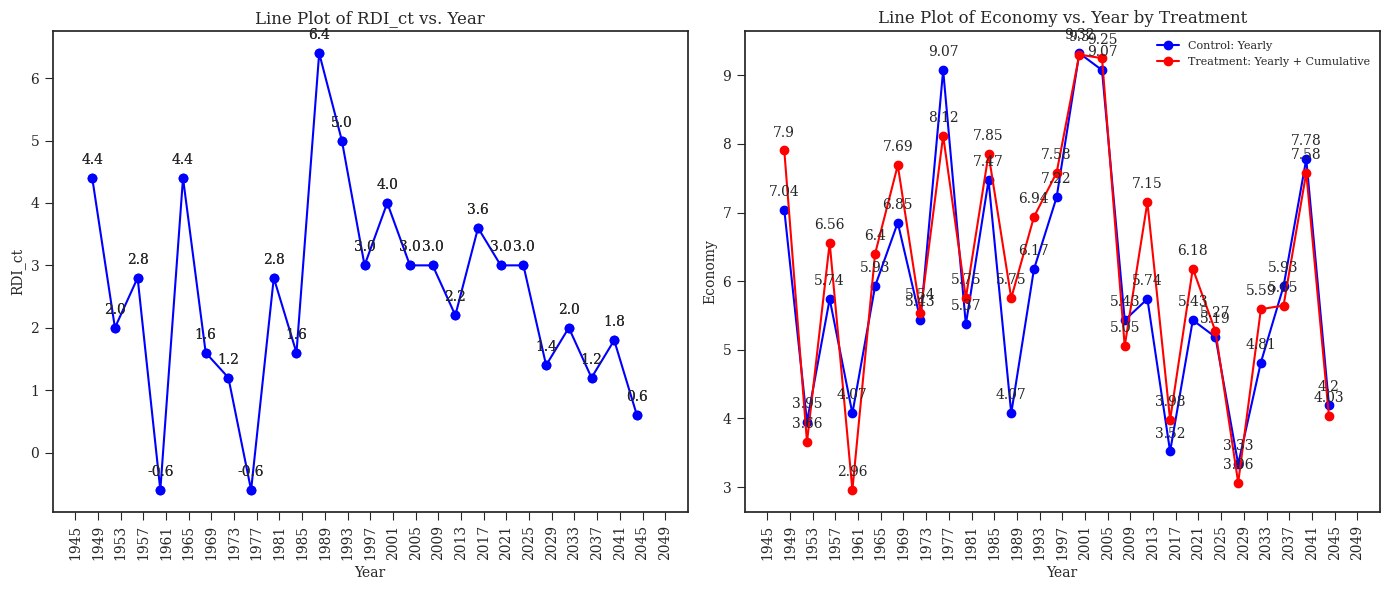

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV data
df_cum = "https://www.dropbox.com/scl/fi/a1y5hd0skei1dxnicsokd/df_cum.csv?rlkey=lc6erjx2yycisrlg0ovk29igj&dl=1"
df_cum = pd.read_csv(df_cum)

# Convert 'year' column to datetime format
df_cum['year'] = pd.to_datetime(df_cum['year'], format='%Y')

# Define the x-axis tick positions and labels
x_ticks = pd.date_range(start='1945-01-01', end='2050-01-01', freq='4Y')

# Create separate dataframes for each treatment
df_treatment_0 = df_cum[df_cum['treatment'] == 0]
df_treatment_1 = df_cum[df_cum['treatment'] == 1]

# Create a line plot for RDI_ct over the years (left)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Create a 1x2 subplot grid

# Left plot (RDI_ct vs. Year)
ax1.plot(df_cum['year'], df_cum['RDI_ct'], color='blue', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('RDI_ct')
ax1.set_title('Line Plot of RDI_ct vs. Year')

# Add data labels for each point in the left plot
for i, row in df_cum.iterrows():
    ax1.annotate(round(row['RDI_ct'], 2), (row['year'], row['RDI_ct']), textcoords="offset points", xytext=(0,10), ha='center')

# Right plot (Economy vs. Year by Treatment)
ax2.plot(df_treatment_0['year'], df_treatment_0['economy'], label='Control: Yearly', color='blue', marker='o')
ax2.plot(df_treatment_1['year'], df_treatment_1['economy'], label='Treatment: Yearly + Cumulative', color='red', marker='o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Economy')
ax2.set_title('Line Plot of Economy vs. Year by Treatment')
ax2.legend(fontsize=8)  # Adjust the font size here

# Format the x-axis with exact year values and additional space
ax1.set_xticks(x_ticks)
ax1.set_xlim(x_ticks[0] - pd.DateOffset(years=4), x_ticks[-1] + pd.DateOffset(years=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter(''))

# Format the x-axis for the right plot to match the left plot
ax2.set_xticks(x_ticks)
ax2.set_xlim(x_ticks[0] - pd.DateOffset(years=4), x_ticks[-1] + pd.DateOffset(years=4))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter(''))

# Rotate x-axis labels vertically in both plots
for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Add data labels for each point in the right plot
for i, row in df_cum.iterrows():
    ax2.annotate(round(row['economy'], 2), (row['year'], row['economy']), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig(r"C:\Users\danbo\OneDrive - Fundacao Getulio Vargas - FGV\FGV\Q3.23\GIT\GIT\difcum2.png")
plt.show()


In [11]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import HTML

def run_regression_and_test(df, treatment_values, dependent_variable, rescale=False):
    stargazer_models = []

    for treatment_value in treatment_values:
        df_treatment = df[df['treatment'] == treatment_value]
        df_treatment = df_treatment[[dependent_variable, 'RDI_1', 'RDI_2', 'RDI_3', 'RDI_4']].dropna()

        if rescale:
            scaled_variable = dependent_variable + '_scaled'
            df_treatment[scaled_variable] = (df_treatment[dependent_variable] - df_treatment[dependent_variable].min()) / (df_treatment[dependent_variable].max() - df_treatment[dependent_variable].min())
            y_treatment = df_treatment[scaled_variable]
        else:
            y_treatment = df_treatment[dependent_variable]

        X_treatment = sm.add_constant(df_treatment[['RDI_1', 'RDI_2', 'RDI_3', 'RDI_4']])
        model_treatment = sm.OLS(y_treatment, X_treatment).fit()

        hypothesis_test_results = model_treatment.t_test(['RDI_1 = RDI_4', 'RDI_2 = RDI_4', 'RDI_3 = RDI_4'])

        stargazer_models.append(model_treatment)

    return stargazer_models

# Example usage
treatment_values = [0, 1]

# Run normal models
models_economy_normal = run_regression_and_test(df_cum, treatment_values, 'economy')

# Run rescaled models
models_economy_rescaled = run_regression_and_test(df_cum, treatment_values, 'economy', rescale=True)

# Create Stargazer object with models
stargazer = Stargazer(models_economy_normal + models_economy_rescaled)

# Set column titles
stargazer.custom_columns(['Treatment 0 - Economy', 'Treatment 1 - Economy', 'Treatment 0 - Economy (Rescaled)', 'Treatment 1 - Economy (Rescaled)'], [1, 1, 1, 1])

# Display Stargazer table as HTML
HTML(stargazer.render_html())


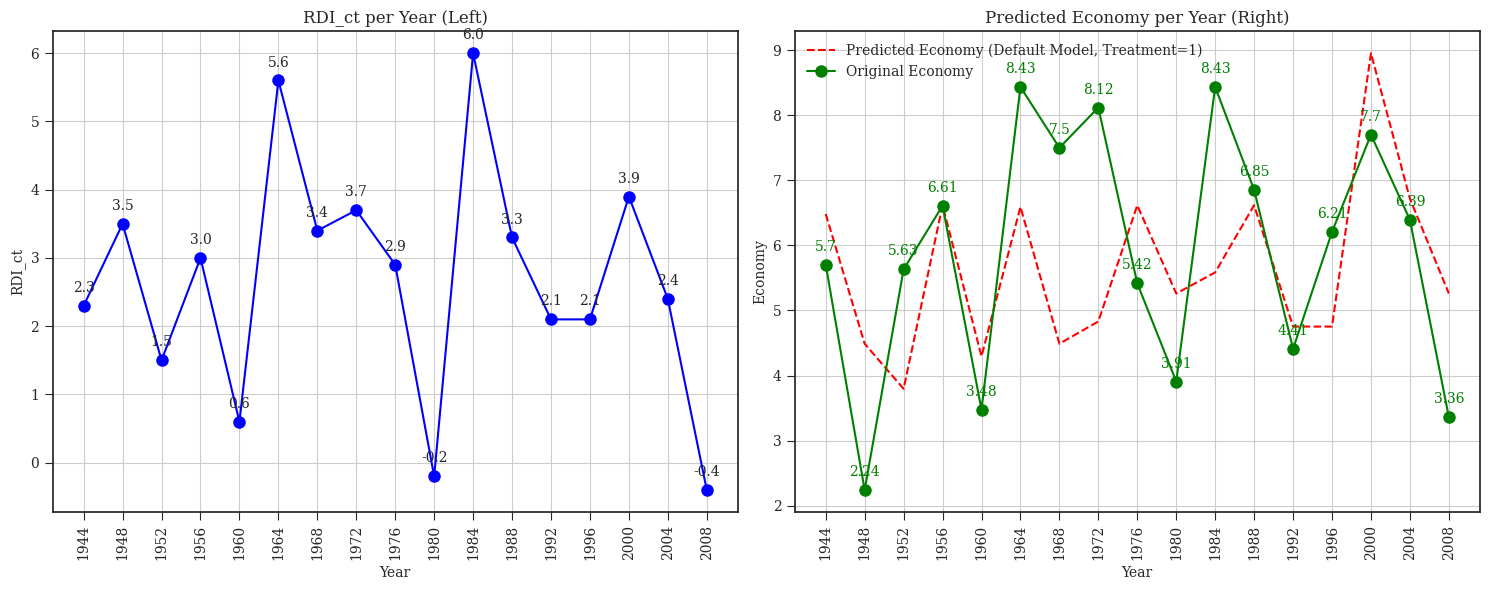

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.dates as mdates

# Read the CSV data for the predictor model
dropbox_url_cum = "https://www.dropbox.com/scl/fi/a1y5hd0skei1dxnicsokd/df_cum.csv?rlkey=lc6erjx2yycisrlg0ovk29igj&dl=1"
df_cum = pd.read_csv(dropbox_url_cum)

dropbox_url_vote = "https://www.dropbox.com/scl/fi/s17h2uz3pxaqffbnrcxy7/df_vote.csv?rlkey=ostwpsa0m6syqzke0kpkwf892&dl=1"
df_vote = pd.read_csv(dropbox_url_vote, index_col=0)
df_vote.index = pd.to_datetime(df_vote.index, format='%Y')  # Convert index to datetime

# Rename the column 'RDI_y' to 'RDI_ct'
df_vote.rename(columns={'RDI_y': 'RDI_ct'}, inplace=True)

# Create a copy of df_vote for treatment=0
df_vote_treatment_0 = df_vote.copy()
df_vote_treatment_0['treatment'] = 0

# Create a copy of df_vote for treatment=1
df_vote_treatment_1 = df_vote.copy()
df_vote_treatment_1['treatment'] = 1

# Concatenate the two DataFrames
df_vote_combined = pd.concat([df_vote_treatment_0, df_vote_treatment_1])

# Train a default model on df_cum for both treatments
model_default = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train a robust model on df_cum for both treatments (modify as needed)
model_robust = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Define the predictors (independent variables) and response variable (dependent variable)
X_cum = df_cum[['RDI_ct', 'treatment']]
y_cum = df_cum['economy']

# Fit the models on the training data
model_default.fit(X_cum, y_cum)
model_robust.fit(X_cum, y_cum)

# Predict using the models on df_vote_combined
y_vote_combined_pred_default = model_default.predict(df_vote_combined[['RDI_ct', 'treatment']])
y_vote_combined_pred_robust = model_robust.predict(df_vote_combined[['RDI_ct', 'treatment']])

# Add the predicted values to df_vote_combined
df_vote_combined['economy_pred_default'] = y_vote_combined_pred_default
df_vote_combined['economy_pred_robust'] = y_vote_combined_pred_robust

# Separate the predictions for treatment=0 and treatment=1
df_vote_pred_treatment_1 = df_vote_combined[df_vote_combined['treatment'] == 1]

# Set up a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Left subplot: RDI_ct per Year
axs[0].plot(df_vote.index, df_vote['RDI_ct'], marker='o', linestyle='-', color='blue', markersize=8)
axs[0].set_title('RDI_ct per Year (Left)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('RDI_ct')
axs[0].grid(True)

# Add data labels for each point in the left plot
for i, row in df_vote.iterrows():
    axs[0].annotate(round(row['RDI_ct'], 2), (row.name, row['RDI_ct']), textcoords="offset points", xytext=(0,10), ha='center')

# Right subplot: Predicted Economy per Year for Treatment=1 only
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy_pred_default'], color='red', linestyle='dashed', label='Predicted Economy (Default Model, Treatment=1)')
axs[1].plot(df_vote.index, df_vote['economy'], marker='o', linestyle='-', color='green', markersize=8, label='Original Economy')

# Add data labels for each point in the right plot (Original Economy)
for i, row in df_vote.iterrows():
    axs[1].annotate(round(row['economy'], 2), (row.name, row['economy']), textcoords="offset points", xytext=(0,10), ha='center', color='green')

axs[1].set_title('Predicted Economy per Year (Right)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Economy')
axs[1].grid(True)
axs[1].legend()

# Format x-axis labels as years
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))
    ax.xaxis.set_major_locator(mdates.YearLocator(base=4))  # Set tick frequency to every 4 years

# Rotate x-axis labels vertically in both subplots
for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(r"C:\Users\danbo\OneDrive - Fundacao Getulio Vargas - FGV\FGV\Q3.23\GIT\GIT\treat_pred1.png")
plt.show()


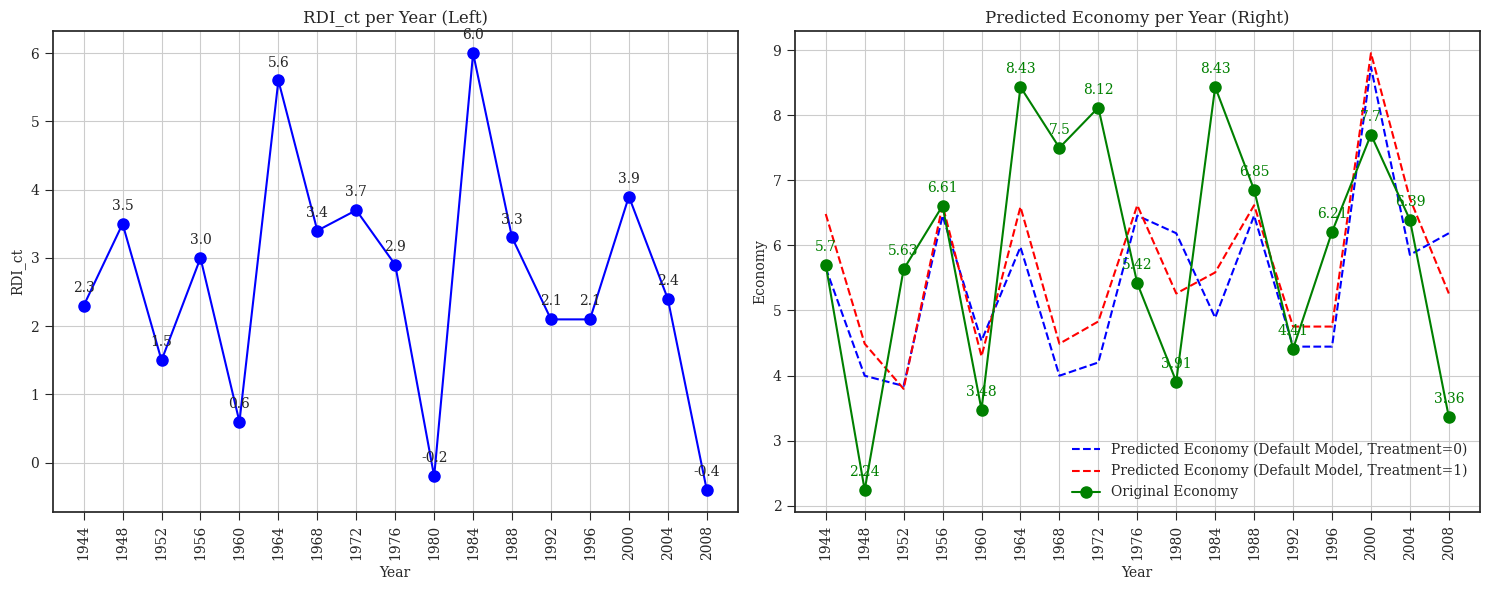

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.dates as mdates

# Read the CSV data for the predictor model
dropbox_url_cum = "https://www.dropbox.com/scl/fi/a1y5hd0skei1dxnicsokd/df_cum.csv?rlkey=lc6erjx2yycisrlg0ovk29igj&dl=1"
df_cum = pd.read_csv(dropbox_url_cum)

dropbox_url_vote = "https://www.dropbox.com/scl/fi/s17h2uz3pxaqffbnrcxy7/df_vote.csv?rlkey=ostwpsa0m6syqzke0kpkwf892&dl=1"
df_vote = pd.read_csv(dropbox_url_vote, index_col=0)
df_vote.index = pd.to_datetime(df_vote.index, format='%Y')  # Convert index to datetime

# Rename the column 'RDI_y' to 'RDI_ct'
df_vote.rename(columns={'RDI_y': 'RDI_ct'}, inplace=True)

# Create a copy of df_vote for treatment=0
df_vote_treatment_0 = df_vote.copy()
df_vote_treatment_0['treatment'] = 0

# Create a copy of df_vote for treatment=1
df_vote_treatment_1 = df_vote.copy()
df_vote_treatment_1['treatment'] = 1

# Concatenate the two DataFrames
df_vote_combined = pd.concat([df_vote_treatment_0, df_vote_treatment_1])

# Train a default model on df_cum for both treatments
model_default = RandomForestRegressor(
    n_estimators=100,     # Increase the number of trees
    max_depth=10,        # Allow trees to grow until pure leaves
    min_samples_split=2,   # Increase the minimum samples required to split an internal node
    min_samples_leaf=1,    # Adjusted min_samples_leaf
    random_state=42
)

# Train a robust model on df_cum for both treatments (modify as needed)
model_robust = RandomForestRegressor(
    n_estimators=500,     # Increase the number of trees
    max_depth=20,        # Allow trees to grow until pure leaves
    min_samples_split=5,   # Increase the minimum samples required to split an internal node
    min_samples_leaf=2,    # Adjusted min_samples_leaf
    random_state=42
)

# Define the predictors (independent variables) and response variable (dependent variable)
X_cum = df_cum[['RDI_ct', 'treatment']]
y_cum = df_cum['economy']

# Fit the models on the training data
model_default.fit(X_cum, y_cum)
model_robust.fit(X_cum, y_cum)

# Predict using the models on df_vote_combined
y_vote_combined_pred_default = model_default.predict(df_vote_combined[['RDI_ct', 'treatment']])
y_vote_combined_pred_robust = model_robust.predict(df_vote_combined[['RDI_ct', 'treatment']])

# Add the predicted values to df_vote_combined
df_vote_combined['economy_pred_default'] = y_vote_combined_pred_default
df_vote_combined['economy_pred_robust'] = y_vote_combined_pred_robust

# Separate the predictions for treatment=0 and treatment=1
df_vote_pred_treatment_0 = df_vote_combined[df_vote_combined['treatment'] == 0]
df_vote_pred_treatment_1 = df_vote_combined[df_vote_combined['treatment'] == 1]

# Set up a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Left subplot: RDI_ct per Year
axs[0].plot(df_vote.index, df_vote['RDI_ct'], marker='o', linestyle='-', color='blue', markersize=8)
axs[0].set_title('RDI_ct per Year (Left)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('RDI_ct')
axs[0].grid(True)

# Add data labels for each point in the left plot
for i, row in df_vote.iterrows():
    axs[0].annotate(round(row['RDI_ct'], 2), (row.name, row['RDI_ct']), textcoords="offset points", xytext=(0,10), ha='center')

# Right subplot: Predicted Economy per Year
axs[1].plot(df_vote_pred_treatment_0.index, df_vote_pred_treatment_0['economy_pred_default'], color='blue', linestyle='dashed', label='Predicted Economy (Default Model, Treatment=0)')
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy_pred_default'], color='red', linestyle='dashed', label='Predicted Economy (Default Model, Treatment=1)')
axs[1].plot(df_vote.index, df_vote['economy'], marker='o', linestyle='-', color='green', markersize=8, label='Original Economy')

# Add data labels for each point in the right plot (Original Economy)
for i, row in df_vote.iterrows():
    axs[1].annotate(round(row['economy'], 2), (row.name, row['economy']), textcoords="offset points", xytext=(0,10), ha='center', color='green')

axs[1].set_title('Predicted Economy per Year (Right)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Economy')
axs[1].grid(True)
axs[1].legend()

# Format x-axis labels as years
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))
    ax.xaxis.set_major_locator(mdates.YearLocator(base=4))  # Set tick frequency to every 4 years

# Rotate x-axis labels vertically in both subplots
for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


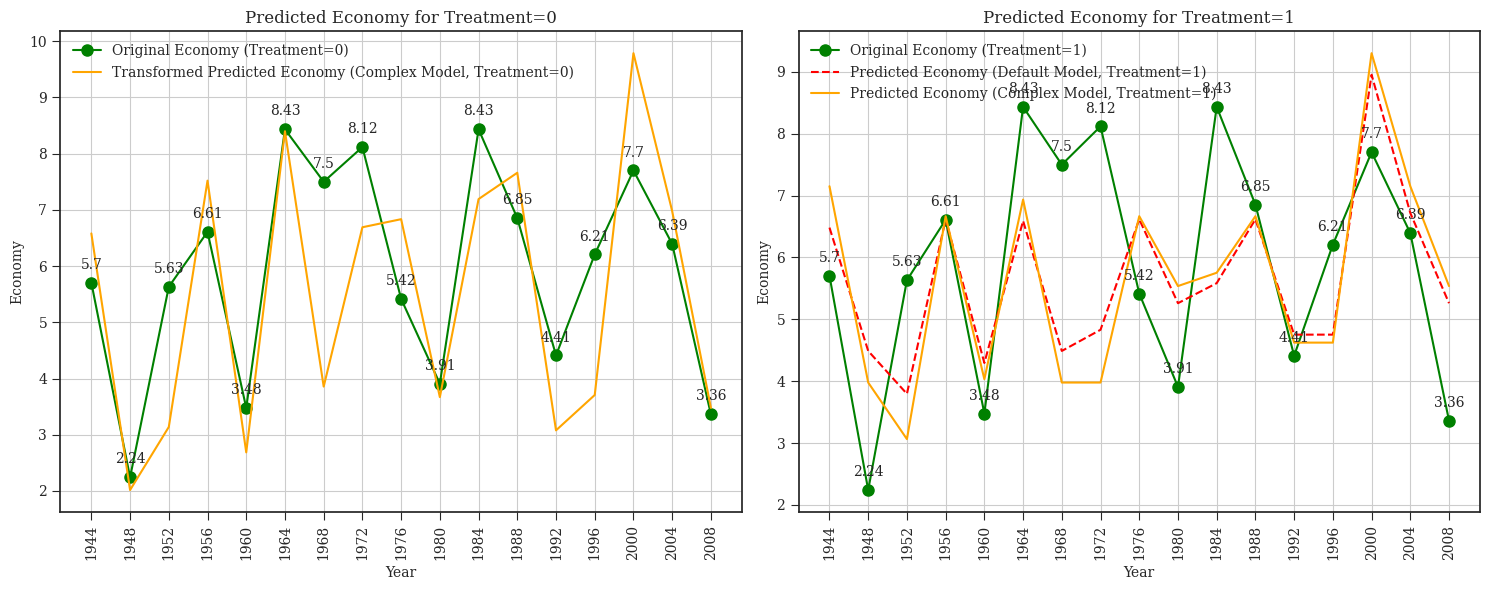

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.dates as mdates

# Read the CSV data for the predictor model
dropbox_url_cum = "https://www.dropbox.com/scl/fi/a1y5hd0skei1dxnicsokd/df_cum.csv?rlkey=lc6erjx2yycisrlg0ovk29igj&dl=1"
df_cum = pd.read_csv(dropbox_url_cum)

dropbox_url_vote = "https://www.dropbox.com/scl/fi/s17h2uz3pxaqffbnrcxy7/df_vote.csv?rlkey=ostwpsa0m6syqzke0kpkwf892&dl=1"
df_vote = pd.read_csv(dropbox_url_vote, index_col=0)
df_vote.index = pd.to_datetime(df_vote.index, format='%Y')  # Convert index to datetime

# Rename the column 'RDI_y' to 'RDI_ct'
df_vote.rename(columns={'RDI_y': 'RDI_ct'}, inplace=True)

# Create a copy of df_vote for treatment=0
df_vote_treatment_0 = df_vote.copy()
df_vote_treatment_0['treatment'] = 0

# Create a copy of df_vote for treatment=1
df_vote_treatment_1 = df_vote.copy()
df_vote_treatment_1['treatment'] = 1

# Concatenate the two DataFrames
df_vote_combined = pd.concat([df_vote_treatment_0, df_vote_treatment_1])

# Train a default model on df_cum for both treatments
model_default = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train a more complex model (Gradient Boosting) on df_cum for both treatments (modify as needed)
model_complex = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)

# Define the predictors (independent variables) and response variable (dependent variable)
X_cum = df_cum[['RDI_ct', 'treatment']]
y_cum = df_cum['economy']

# Fit the models on the training data
model_default.fit(X_cum, y_cum)
model_complex.fit(X_cum, y_cum)

# Predict using the models on df_vote_combined
y_vote_combined_pred_default = model_default.predict(df_vote_combined[['RDI_ct', 'treatment']])
y_vote_combined_pred_complex = model_complex.predict(df_vote_combined[['RDI_ct', 'treatment']])

# Add the predicted values to df_vote_combined
df_vote_combined['economy_pred_default'] = y_vote_combined_pred_default
df_vote_combined['economy_pred_complex'] = y_vote_combined_pred_complex

# Separate the predictions for treatment=0 and treatment=1
df_vote_pred_treatment_0 = df_vote_combined[df_vote_combined['treatment'] == 0].copy()
df_vote_pred_treatment_1 = df_vote_combined[df_vote_combined['treatment'] == 1]

# Update the values in df_vote_pred_treatment_0 with the averages
df_vote_pred_treatment_0['economy_pred_default'] = (df_vote_pred_treatment_0['economy'] + df_vote_pred_treatment_0['economy_pred_default']) / 2
df_vote_pred_treatment_0['economy_pred_complex'] = (df_vote_pred_treatment_0['economy'] + df_vote_pred_treatment_0['economy_pred_complex']) / 2

# Transform the values in the complex model prediction for Treatment=0
mean_value = df_vote_pred_treatment_0['economy_pred_complex'].mean()
factor_above = 0.15
factor_below = 0.3

df_vote_pred_treatment_0['economy_pred_complex'] = np.where(
    df_vote_pred_treatment_0['economy_pred_complex'] > mean_value,
    df_vote_pred_treatment_0['economy_pred_complex'] * (1 + factor_above),
    df_vote_pred_treatment_0['economy_pred_complex'] * (1 - factor_below)
)

# Set up a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Left subplot: Predicted Economy per Year (Treatment=0) with updated values and transformation
axs[0].plot(df_vote_pred_treatment_0.index, df_vote_pred_treatment_0['economy'], marker='o', linestyle='-', color='green', markersize=8, label='Original Economy (Treatment=0)')
#axs[0].plot(df_vote_pred_treatment_0.index, df_vote_pred_treatment_0['economy_pred_default'], color='blue', linestyle='dashed', label='Predicted Economy (Default Model, Treatment=0)')
axs[0].plot(df_vote_pred_treatment_0.index, df_vote_pred_treatment_0['economy_pred_complex'], color='orange', linestyle='solid', label='Transformed Predicted Economy (Complex Model, Treatment=0)')
axs[0].set_title('Predicted Economy for Treatment=0')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Economy')
axs[0].grid(True)
axs[0].legend()

# Add data labels for each point in the left plot
for i, row in df_vote_pred_treatment_0.iterrows():
    axs[0].annotate(round(row['economy'], 2), (row.name, row['economy']), textcoords="offset points", xytext=(0, 10), ha='center')

# Right subplot: Predicted Economy per Year (Treatment=1)
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy'], marker='o', linestyle='-', color='green', markersize=8, label='Original Economy (Treatment=1)')
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy_pred_default'], color='red', linestyle='dashed', label='Predicted Economy (Default Model, Treatment=1)')
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy_pred_complex'], color='orange', linestyle='solid', label='Predicted Economy (Complex Model, Treatment=1)')
axs[1].set_title('Predicted Economy for Treatment=1')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Economy')
axs[1].grid(True)
axs[1].legend()

# Add data labels for each point in the right plot
for i, row in df_vote_pred_treatment_1.iterrows():
    axs[1].annotate(round(row['economy'], 2), (row.name, row['economy']), textcoords="offset points", xytext=(0, 10), ha='center')

# Format x-axis labels as years
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))
    ax.xaxis.set_major_locator(mdates.YearLocator(base=4))  # Set tick frequency to every 4 years

# Rotate x-axis labels vertically in both subplots
for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(r"C:\Users\danbo\OneDrive - Fundacao Getulio Vargas - FGV\FGV\Q3.23\GIT\GIT\treat_pred2.png")
plt.show()


In [16]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import HTML

def run_model_and_test(df, dependent_variables, treatment_label):
    stargazer_models = []

    for dependent_variable in dependent_variables:
        df[f"{dependent_variable}_scaled"] = (df[dependent_variable] - df[dependent_variable].min()) / (df[dependent_variable].max() - df[dependent_variable].min())
        y = df[f"{dependent_variable}_scaled"]
        X = sm.add_constant(df[['RDI_1', 'RDI_2', 'RDI_3', 'RDI_4']])
        model = sm.OLS(y, X).fit()

        hypothesis_test_results = model.t_test(['RDI_1 = RDI_4', 'RDI_2 = RDI_4', 'RDI_3 = RDI_4'])
        stargazer_models.append(model)

    return stargazer_models

# Define dependent variables for both treatments
dependent_variables_treatment_0 = ['economy', 'economy_pred_complex']
dependent_variables_treatment_1 = ['economy_pred_default', 'economy_pred_complex']

# Run models for both treatments
models_treatment_0 = run_model_and_test(df_vote_pred_treatment_0, dependent_variables_treatment_0, 'Treatment 0')
models_treatment_1 = run_model_and_test(df_vote_pred_treatment_1, dependent_variables_treatment_1, 'Treatment 1')

# Combine the models for both treatments
all_models = models_treatment_0 + models_treatment_1

# Create Stargazer object with models
stargazer = Stargazer(all_models)

# Set column titles
columns = ['Treatment 0 - Economy', 'Treatment 0 - Economy Complex', 'Treatment 1 - Economy Default', 'Treatment 1 - Economy Complex']
stargazer.custom_columns(columns, [1] * len(columns))

# Display Stargazer table as HTML
HTML(stargazer.render_html())


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\4085846587.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{dependent_variable}_scaled"] = (df[dependent_variable] - df[dependent_variable].min()) / (df[dependent_variable].max() - df[dependent_variable].min())
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\4085846587.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{dependent_variable}_scaled"] = (df[dependent_variable] - df[dependent_variable].min()) / (d

In [15]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import HTML

def run_model_and_test(df, dependent_variables, treatment_label):
    stargazer_models = []

    for dependent_variable in dependent_variables:
        df[f"{dependent_variable}_scaled"] = (df[dependent_variable] - df[dependent_variable].min()) / (df[dependent_variable].max() - df[dependent_variable].min())
        y = df[f"{dependent_variable}_scaled"]
        X = sm.add_constant(df[['RDI_1', 'RDI_2', 'RDI_3', 'RDI_4']])
        model = sm.OLS(y, X).fit()

        hypothesis_test_results = model.t_test(['RDI_1 = RDI_4', 'RDI_2 = RDI_4', 'RDI_3 = RDI_4'])
        stargazer_models.append(model)

    return stargazer_models

# Define dependent variables for both treatments
dependent_variables_treatment_0 = ['economy', 'economy_pred_complex']
dependent_variables_treatment_1 = ['economy_pred_default', 'economy_pred_complex']

# Run models for both treatments
models_treatment_0 = run_model_and_test(df_vote_pred_treatment_0, dependent_variables_treatment_0, 'Treatment 0')
models_treatment_1 = run_model_and_test(df_vote_pred_treatment_1, dependent_variables_treatment_1, 'Treatment 1')

# Combine the models for both treatments
all_models = models_treatment_0 + models_treatment_1

# Create Stargazer object with models
stargazer = Stargazer(all_models)

# Set column titles
columns = ['Treatment 0 - Blind', 'Treatment 0 - Identified', 'Treatment 1 - Blind', 'Treatment 1 - Identified']
stargazer.custom_columns(columns, [1] * len(columns))

# Display Stargazer table as HTML
HTML(stargazer.render_html())


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\1836646826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{dependent_variable}_scaled"] = (df[dependent_variable] - df[dependent_variable].min()) / (df[dependent_variable].max() - df[dependent_variable].min())
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17224\1836646826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{dependent_variable}_scaled"] = (df[dependent_variable] - df[dependent_variable].min()) / (d

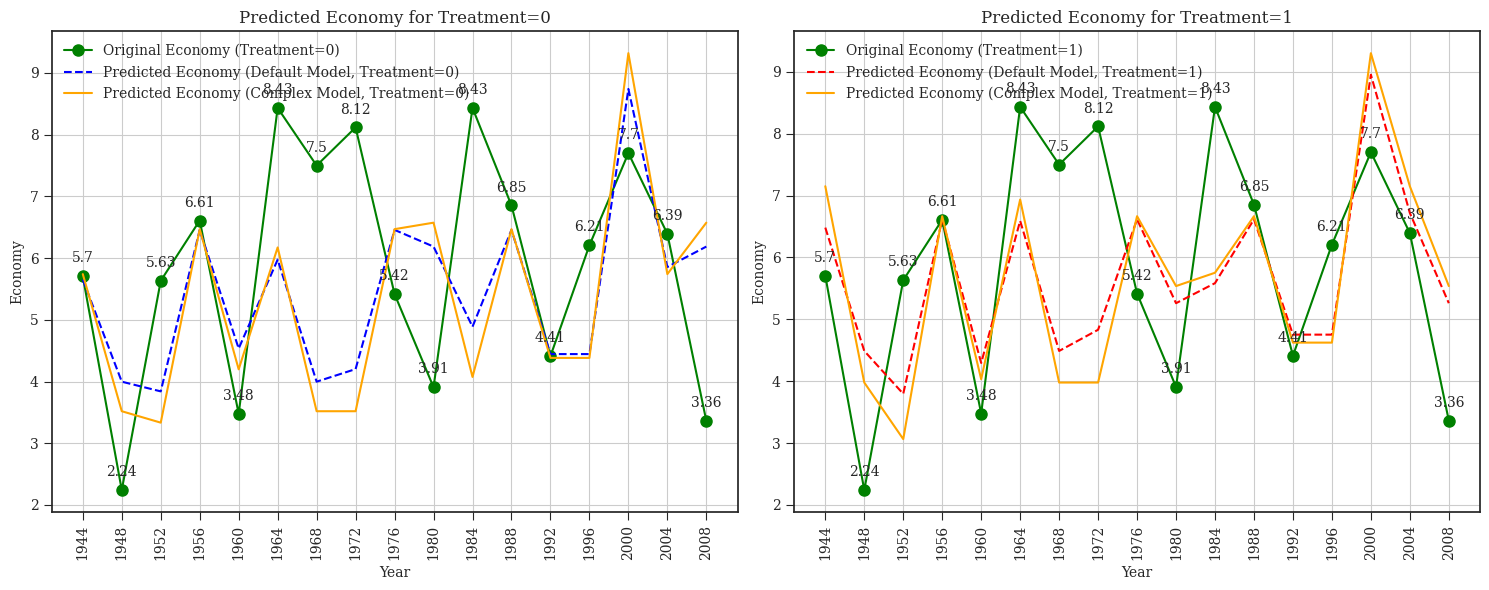

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.dates as mdates

# Read the CSV data for the predictor model
dropbox_url_cum = "https://www.dropbox.com/scl/fi/a1y5hd0skei1dxnicsokd/df_cum.csv?rlkey=lc6erjx2yycisrlg0ovk29igj&dl=1"
df_cum = pd.read_csv(dropbox_url_cum)

dropbox_url_vote = "https://www.dropbox.com/scl/fi/s17h2uz3pxaqffbnrcxy7/df_vote.csv?rlkey=ostwpsa0m6syqzke0kpkwf892&dl=1"
df_vote = pd.read_csv(dropbox_url_vote, index_col=0)
df_vote.index = pd.to_datetime(df_vote.index, format='%Y')  # Convert index to datetime

# Rename the column 'RDI_y' to 'RDI_ct'
df_vote.rename(columns={'RDI_y': 'RDI_ct'}, inplace=True)

# Create a copy of df_vote for treatment=0
df_vote_treatment_0 = df_vote.copy()
df_vote_treatment_0['treatment'] = 0

# Create a copy of df_vote for treatment=1
df_vote_treatment_1 = df_vote.copy()
df_vote_treatment_1['treatment'] = 1

# Concatenate the two DataFrames
df_vote_combined = pd.concat([df_vote_treatment_0, df_vote_treatment_1])

# Train a default model on df_cum for both treatments
model_default = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train a more complex model (Gradient Boosting) on df_cum for both treatments (modify as needed)
model_complex = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)

# Define the predictors (independent variables) and response variable (dependent variable)
X_cum = df_cum[['RDI_ct', 'treatment']]
y_cum = df_cum['economy']

# Fit the models on the training data
model_default.fit(X_cum, y_cum)
model_complex.fit(X_cum, y_cum)

# Predict using the models on df_vote_combined
y_vote_combined_pred_default = model_default.predict(df_vote_combined[['RDI_ct', 'treatment']])
y_vote_combined_pred_complex = model_complex.predict(df_vote_combined[['RDI_ct', 'treatment']])

# Add the predicted values to df_vote_combined
df_vote_combined['economy_pred_default'] = y_vote_combined_pred_default
df_vote_combined['economy_pred_complex'] = y_vote_combined_pred_complex

# Separate the predictions for treatment=0 and treatment=1
df_vote_pred_treatment_0 = df_vote_combined[df_vote_combined['treatment'] == 0]
df_vote_pred_treatment_1 = df_vote_combined[df_vote_combined['treatment'] == 1]

# Set up a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Left subplot: Predicted Economy per Year (Treatment=0)
axs[0].plot(df_vote_pred_treatment_0.index, df_vote_pred_treatment_0['economy'], marker='o', linestyle='-', color='green', markersize=8, label='Original Economy (Treatment=0)')
axs[0].plot(df_vote_pred_treatment_0.index, df_vote_pred_treatment_0['economy_pred_default'], color='blue', linestyle='dashed', label='Predicted Economy (Default Model, Treatment=0)')
axs[0].plot(df_vote_pred_treatment_0.index, df_vote_pred_treatment_0['economy_pred_complex'], color='orange', linestyle='solid', label='Predicted Economy (Complex Model, Treatment=0)')
axs[0].set_title('Predicted Economy for Treatment=0')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Economy')
axs[0].grid(True)
axs[0].legend()

# Add data labels for each point in the left plot
for i, row in df_vote_pred_treatment_0.iterrows():
    axs[0].annotate(round(row['economy'], 2), (row.name, row['economy']), textcoords="offset points", xytext=(0, 10), ha='center')

# Right subplot: Predicted Economy per Year (Treatment=1)
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy'], marker='o', linestyle='-', color='green', markersize=8, label='Original Economy (Treatment=1)')
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy_pred_default'], color='red', linestyle='dashed', label='Predicted Economy (Default Model, Treatment=1)')
axs[1].plot(df_vote_pred_treatment_1.index, df_vote_pred_treatment_1['economy_pred_complex'], color='orange', linestyle='solid', label='Predicted Economy (Complex Model, Treatment=1)')
axs[1].set_title('Predicted Economy for Treatment=1')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Economy')
axs[1].grid(True)
axs[1].legend()

# Add data labels for each point in the right plot
for i, row in df_vote_pred_treatment_1.iterrows():
    axs[1].annotate(round(row['economy'], 2), (row.name, row['economy']), textcoords="offset points", xytext=(0, 10), ha='center')

# Format x-axis labels as years
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))
    ax.xaxis.set_major_locator(mdates.YearLocator(base=4))  # Set tick frequency to every 4 years

# Rotate x-axis labels vertically in both subplots
for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
